In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Create a set of Random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy


In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

599

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key



In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d9f1fcccc084e9c4d3d01850c2920c40


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime


In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vaini
Processing Record 2 of Set 1 | elmina
Processing Record 3 of Set 1 | kodiak
Processing Record 4 of Set 1 | georgetown
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | saskylakh
Processing Record 7 of Set 1 | maniitsoq
Processing Record 8 of Set 1 | santa maria del oro
Processing Record 9 of Set 1 | utiroa
City not found. Skipping...
Processing Record 10 of Set 1 | atuona
Processing Record 11 of Set 1 | bayeux
Processing Record 12 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 13 of Set 1 | tasiilaq
Processing Record 14 of Set 1 | carauari
Processing Record 15 of Set 1 | hithadhoo
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | bluff
Processing Record 18 of Set 1 | new norfolk
Processing Record 19 of Set 1 | bengkulu
Processing Record 20 of Set 1 | tiznit
Processing Record 21 of Set 1 | busselton
Processing Record 22 of Set 1

Processing Record 34 of Set 4 | phan thiet
Processing Record 35 of Set 4 | lorengau
Processing Record 36 of Set 4 | portland
Processing Record 37 of Set 4 | cidreira
Processing Record 38 of Set 4 | hasaki
Processing Record 39 of Set 4 | llanes
Processing Record 40 of Set 4 | nabire
Processing Record 41 of Set 4 | atherton
Processing Record 42 of Set 4 | sitka
Processing Record 43 of Set 4 | kaitangata
Processing Record 44 of Set 4 | sorvag
City not found. Skipping...
Processing Record 45 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 46 of Set 4 | antas
Processing Record 47 of Set 4 | kosh-agach
Processing Record 48 of Set 4 | mahebourg
Processing Record 49 of Set 4 | kabompo
Processing Record 50 of Set 4 | ugoofaaru
Processing Record 1 of Set 5 | ilinskiy
Processing Record 2 of Set 5 | jutai
Processing Record 3 of Set 5 | mehamn
Processing Record 4 of Set 5 | salinas
Processing Record 5 of Set 5 | ulaanbaatar
Processing Record 6 of Set 5 | souillac
Processing Rec

Processing Record 25 of Set 8 | bargal
City not found. Skipping...
Processing Record 26 of Set 8 | high level
Processing Record 27 of Set 8 | safranbolu
Processing Record 28 of Set 8 | kathu
Processing Record 29 of Set 8 | carutapera
Processing Record 30 of Set 8 | houston
Processing Record 31 of Set 8 | sento se
City not found. Skipping...
Processing Record 32 of Set 8 | shankargarh
Processing Record 33 of Set 8 | urdzhar
City not found. Skipping...
Processing Record 34 of Set 8 | waddan
Processing Record 35 of Set 8 | sidrolandia
Processing Record 36 of Set 8 | general pico
Processing Record 37 of Set 8 | vila velha
Processing Record 38 of Set 8 | tual
Processing Record 39 of Set 8 | mormugao
Processing Record 40 of Set 8 | anadyr
Processing Record 41 of Set 8 | morondava
Processing Record 42 of Set 8 | la ronge
Processing Record 43 of Set 8 | kailua
Processing Record 44 of Set 8 | dandong
Processing Record 45 of Set 8 | chancay
Processing Record 46 of Set 8 | kamenskoye
City not fou

Processing Record 12 of Set 12 | kargil
Processing Record 13 of Set 12 | anifion
City not found. Skipping...
Processing Record 14 of Set 12 | preobrazheniye
Processing Record 15 of Set 12 | rawah
Processing Record 16 of Set 12 | savannakhet
Processing Record 17 of Set 12 | luganville
Processing Record 18 of Set 12 | pointe-noire
Processing Record 19 of Set 12 | tevriz
Processing Record 20 of Set 12 | port-gentil
Processing Record 21 of Set 12 | tsumeb
Processing Record 22 of Set 12 | rawannawi
City not found. Skipping...
Processing Record 23 of Set 12 | bairnsdale
Processing Record 24 of Set 12 | slidell
Processing Record 25 of Set 12 | margate
Processing Record 26 of Set 12 | gat
Processing Record 27 of Set 12 | izumo
Processing Record 28 of Set 12 | puerto penasco
Processing Record 29 of Set 12 | mbour
Processing Record 30 of Set 12 | ixtapa
Processing Record 31 of Set 12 | maykain
City not found. Skipping...
Processing Record 32 of Set 12 | perelyub
Processing Record 33 of Set 12 | 

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.20,-175.20,75.20,83,20,11.41,TO,2020-11-04 19:29:54
1,Elmina,5.09,-1.35,80.53,81,0,6.91,GH,2020-11-04 19:29:54
2,Kodiak,57.79,-152.41,30.20,50,20,8.05,US,2020-11-04 19:29:54
3,Georgetown,5.41,100.34,80.01,94,20,5.82,MY,2020-11-04 19:28:09
4,Rikitea,-23.12,-134.97,73.36,76,0,16.11,PF,2020-11-04 19:29:54
5,Saskylakh,71.92,114.08,-3.53,91,97,5.26,RU,2020-11-04 19:29:54
6,Maniitsoq,65.42,-52.90,28.31,96,100,26.15,GL,2020-11-04 19:29:54
7,Santa Maria Del Oro,25.93,-105.37,72.09,24,0,5.28,MX,2020-11-04 19:29:55
8,Atuona,-9.80,-139.03,78.75,77,14,21.52,PF,2020-11-04 19:29:55
9,Bayeux,-7.12,-34.93,82.40,74,0,13.87,BR,2020-11-04 19:29:55


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [12]:
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vaini,TO,2020-11-04 19:29:54,-21.20,-175.20,75.20,83,20,11.41
1,Elmina,GH,2020-11-04 19:29:54,5.09,-1.35,80.53,81,0,6.91
2,Kodiak,US,2020-11-04 19:29:54,57.79,-152.41,30.20,50,20,8.05
3,Georgetown,MY,2020-11-04 19:28:09,5.41,100.34,80.01,94,20,5.82
4,Rikitea,PF,2020-11-04 19:29:54,-23.12,-134.97,73.36,76,0,16.11
...,...,...,...,...,...,...,...,...,...
535,Youghal,IE,2020-11-04 19:31:29,51.95,-7.85,44.60,75,75,4.70
536,Amursk,RU,2020-11-04 19:31:29,50.23,136.90,23.88,79,58,8.28
537,Nemuro,JP,2020-11-04 19:31:29,43.32,145.57,42.40,73,18,19.44
538,Bahia Blanca,AR,2020-11-04 19:31:29,-38.72,-62.27,82.63,31,97,23.31


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
# Import the time module.
import time
today = time.strftime("%x")
today

'11/04/20'

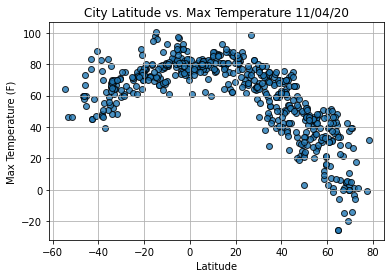

In [16]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

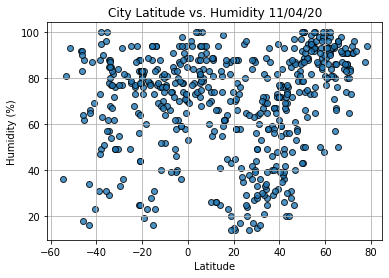

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

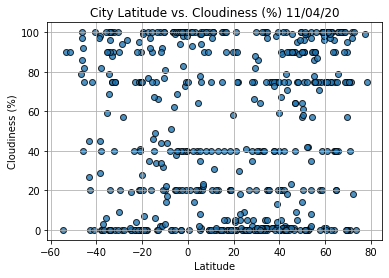

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

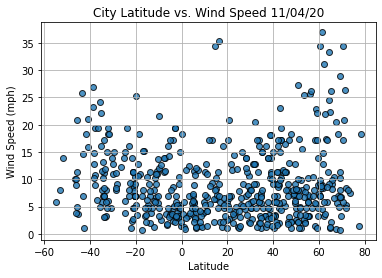

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
# Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
index13 = city_data_df.loc[13]
index13

City                      Ushuaia
Country                        AR
Date          2020-11-04 19:29:56
Lat                         -54.8
Lng                         -68.3
Max Temp                     64.4
Humidity                       36
Cloudiness                      0
Wind Speed                   5.82
Name: 13, dtype: object

In [22]:
#we wanted to get all Northern Hemisphere latitudes, 
#for latitudes greater than or equal to 0
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3       True
4      False
       ...  
535     True
536     True
537     True
538    False
539     True
Name: Lat, Length: 540, dtype: bool

In [23]:
#f we want to return a DataFrame with all data fitting the criteria, for latitudes greater than or equal to 0, 
#we can use the loc method on the city_data_df DataFrame. 
city_data_df.loc[(city_data_df["Lat"] >= 0)]


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Elmina,GH,2020-11-04 19:29:54,5.09,-1.35,80.53,81,0,6.91
2,Kodiak,US,2020-11-04 19:29:54,57.79,-152.41,30.20,50,20,8.05
3,Georgetown,MY,2020-11-04 19:28:09,5.41,100.34,80.01,94,20,5.82
5,Saskylakh,RU,2020-11-04 19:29:54,71.92,114.08,-3.53,91,97,5.26
6,Maniitsoq,GL,2020-11-04 19:29:54,65.42,-52.90,28.31,96,100,26.15
...,...,...,...,...,...,...,...,...,...
534,Jega,NG,2020-11-04 19:31:28,12.22,4.38,85.23,26,1,8.79
535,Youghal,IE,2020-11-04 19:31:29,51.95,-7.85,44.60,75,75,4.70
536,Amursk,RU,2020-11-04 19:31:29,50.23,136.90,23.88,79,58,8.28
537,Nemuro,JP,2020-11-04 19:31:29,43.32,145.57,42.40,73,18,19.44


In [26]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [27]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

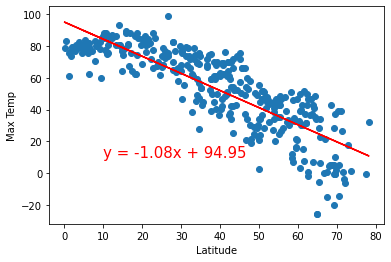

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,10))

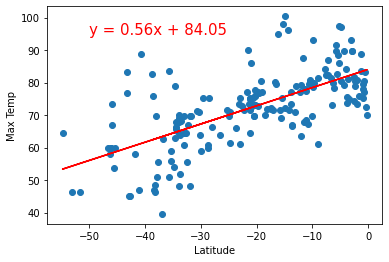

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,95))

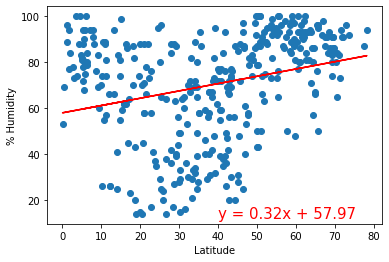

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,12))

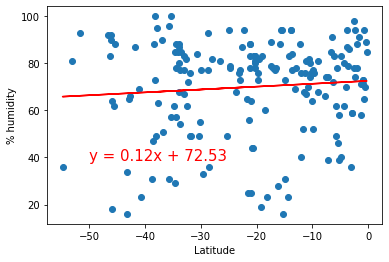

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
#call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Humidity', '% humidity', (-50, 39) )

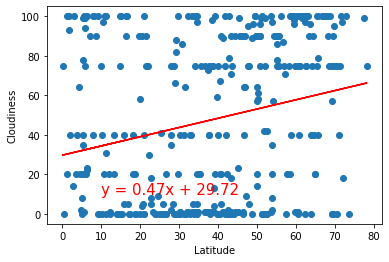

In [47]:
# Linear regression on the Northern Hemisphere Cloudiness Skill Drill
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Cloudiness', 'Cloudiness',(10,10))


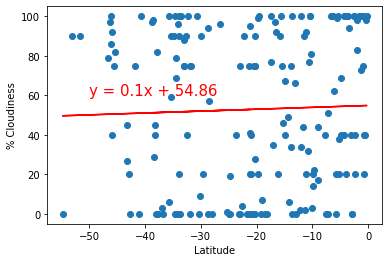

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere \n for % Cloudiness", '% Cloudiness',(-50,60))

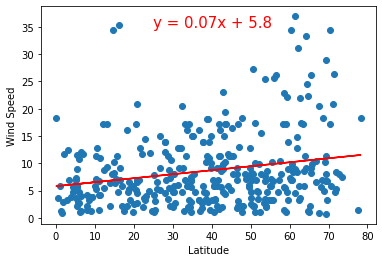

In [55]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(25,35))

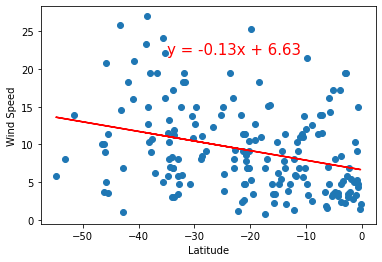

In [69]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-35,22))